https://www.google.com/search?q=mario+kart+8++deluxe+heavy+mii+stats&sxsrf=ALiCzsYodVuxorJolfCd8-AjoOK5BjtBhA%3A1669174302364&ei=HpR9Y_DxFcXnkPIP_6-YqAM&ved=0ahUKEwjw-PDqrsP7AhXFM0QIHf8XBjUQ4dUDCBA&uact=5&oq=mario+kart+8++deluxe+heavy+mii+stats&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCAAQgAQyBQgAEIYDMgUIABCGAzIFCAAQhgM6CggAEEcQ1gQQsAM6BwgAELADEEM6BwgjELACECc6BwgAEIAEEA06BggAEAcQHjoICAAQCBAHEB46BggAEB4QDToICAAQCBAeEA06BQgAEJECOgQIABAeOgYIABAIEB46BggAEBYQHjoKCAAQgAQQhwIQFEoECEEYAEoECEYYAFCeA1ilswdg1rUHaAFwAXgAgAGHAogBtRSSAQYwLjE3LjGYAQCgAQHIAQrAAQE&sclient=gws-wiz-serp

In [80]:
import pandas as pd
pd.set_option('display.max_rows', None)


In [81]:
wr_df = pd.read_parquet('dfs/worldrecords.parquet')
wr_df_slim = wr_df[['track','cc','character','vehicle','tires','glider']]
wr_df_slim.character.unique()

array(['Roy', 'Wario', 'Waluigi', 'Baby Daisy', 'Heavy Mii',
       'Heavy Mii Crossing', 'Donkey Kong', 'Champion Link', 'Rosalina',
       'Dry Bowser', 'Blue Yoshi', 'Baby Peach', 'Heavy Mii Bowser',
       'King Boo', 'Link', 'Lemmy', 'Heavy Mii Pac-Man', 'Heavy Mii DK',
       'Bowser', 'Koopa Troopa', 'Black Yoshi'], dtype=object)

In [82]:
character_stats = pd.read_parquet('dfs/character_stats_adjusted.parquet')
kart_stats = pd.read_parquet('dfs/kart_stats.parquet')
tires_stats = pd.read_parquet('dfs/tires_stats.parquet')
glider_stats = pd.read_parquet('dfs/glider_stats.parquet')

In [83]:
# get list of stats columns and append them to the world record dataframe
for column in glider_stats.columns:
    if column != 'name':
        wr_df_slim[column] = 0
# wr_df_slim

/var/folders/d8/v4dr08kj4k5c9zv_bg2sv47r0000gn/T/ipykernel_63482/1215767457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_df_slim[column] = 0
/var/folders/d8/v4dr08kj4k5c9zv_bg2sv47r0000gn/T/ipykernel_63482/1215767457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_df_slim[column] = 0
/var/folders/d8/v4dr08kj4k5c9zv_bg2sv47r0000gn/T/ipykernel_63482/1215767457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [84]:
kart_name_conversion = {
    'W 25 Silver Arrow': 'Mercedes Silver Arrow',
    'Gold Kart': 'Gold Standard'
}
kart_convert = lambda kart_name: kart_name_conversion[kart_name] if kart_name in kart_name_conversion else kart_name

In [85]:
def add_data(row):
    tire_data = tires_stats[tires_stats['tire name'] == row.tires.strip()].drop(['tire name','total'], axis=1).to_numpy()[0]
    kart_name = kart_convert(row.vehicle.strip())
    kart_data = kart_stats[kart_stats['kart part'] == kart_name].drop(['kart part','total'], axis=1).to_numpy()[0]
    glider_data = glider_stats[glider_stats['name'] == row.glider.strip()].drop(['name'], axis=1).to_numpy()[0]
    # print(row.character)

    character_data = character_stats[character_stats['name'] == row.character.strip()].drop('name',axis=1).to_numpy()[0]
    # print(character_data)
    row[['speed','acceleration','weight','handling','traction/grip','mini-turbo']] += kart_data + tire_data + glider_data +character_data
    return row
wr_stats = wr_df_slim.apply(add_data,axis=1).drop(['character','vehicle','tires','glider'], axis=1)

In [86]:
wr_stats_150 = wr_stats[wr_stats['cc']==150]

In [87]:
from sklearn import cluster

In [88]:
num_clusters = 6
model = cluster.KMeans(n_clusters = num_clusters).fit(wr_stats_150.drop('track',axis=1).to_numpy())
wr_stats_150['label'] = model.labels_

/var/folders/d8/v4dr08kj4k5c9zv_bg2sv47r0000gn/T/ipykernel_63482/4260452596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_stats_150['label'] = model.labels_


In [89]:
from matplotlib import pyplot as plt
from itertools import combinations

In [90]:
attributes = wr_stats.columns[3:]
attributes
attribute_colections = list(combinations(attributes,2))

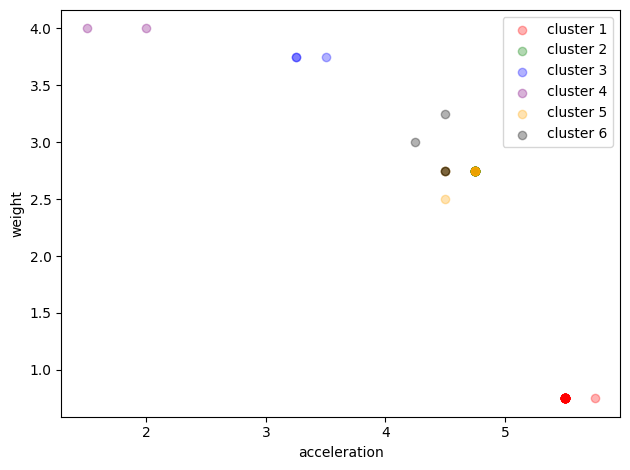

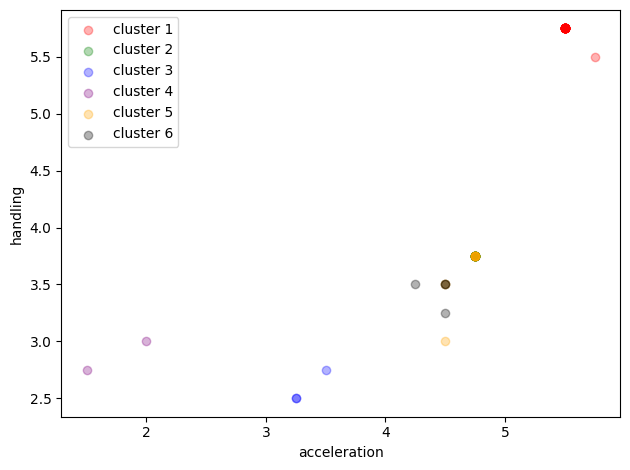

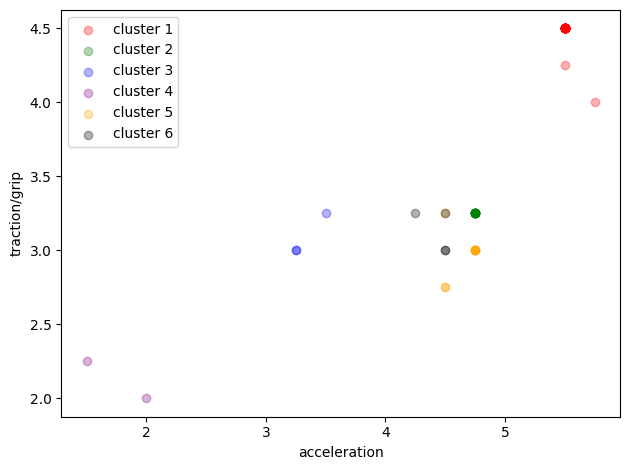

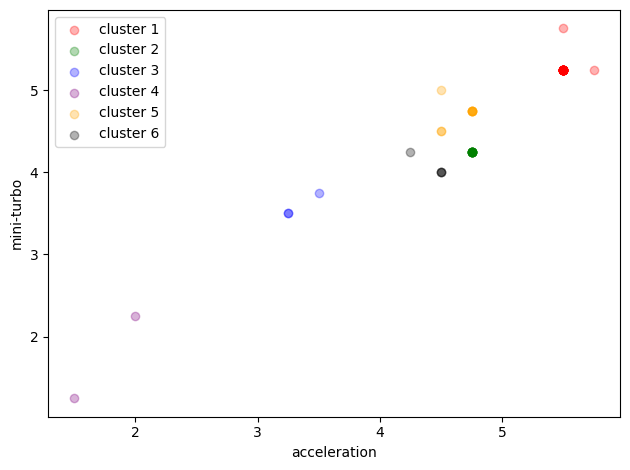

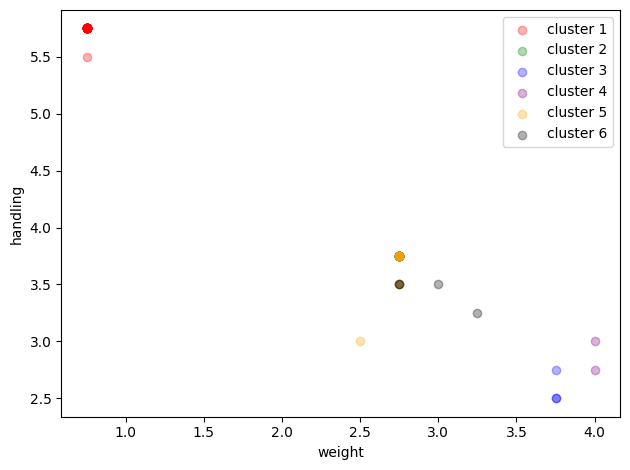

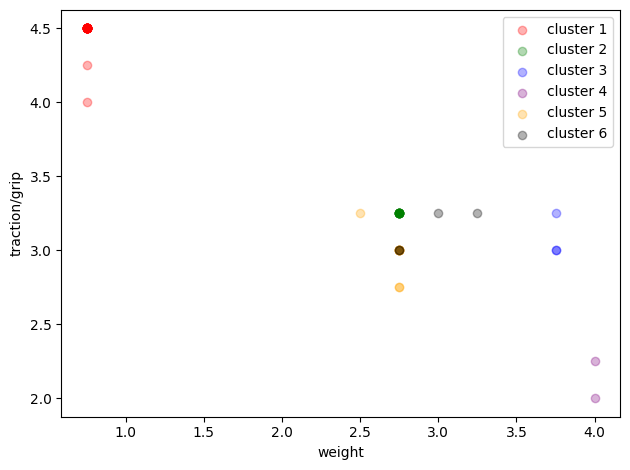

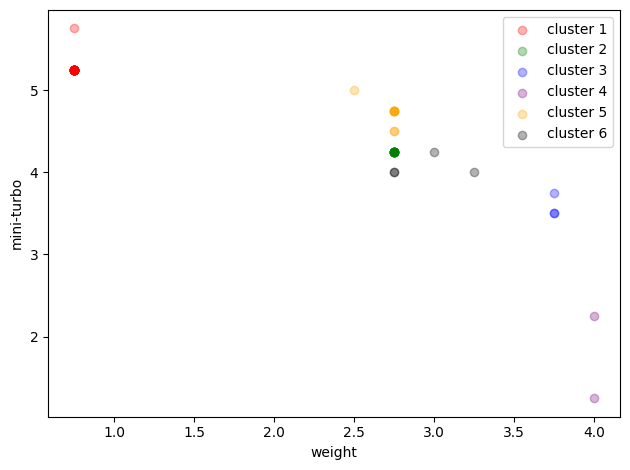

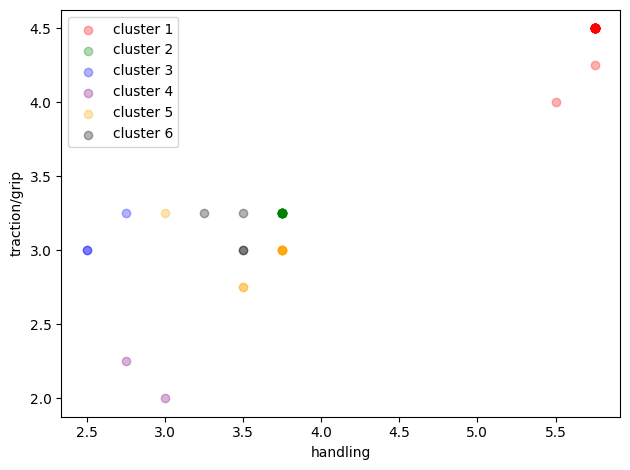

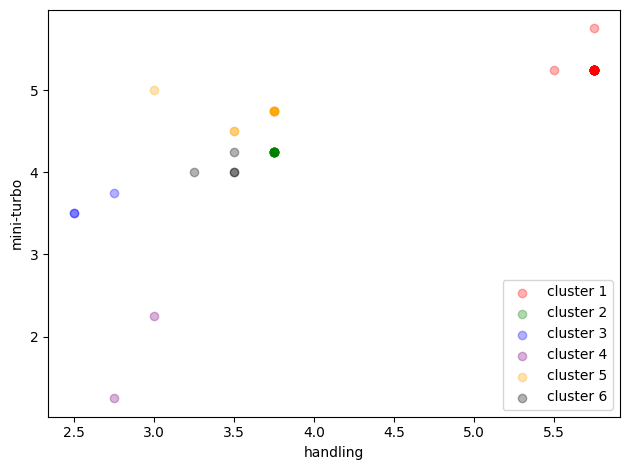

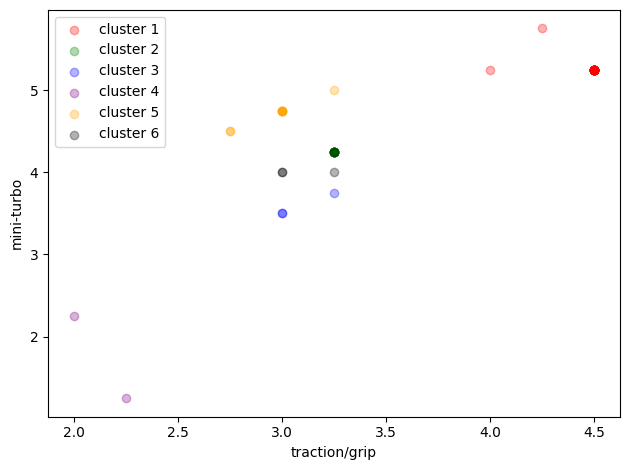

In [91]:
colors = ['red','green','blue','purple','orange','black']
for j, labels in enumerate(attribute_colections):
    x_label, y_label = labels

    # plt.subplot(5,2,j+1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    for i in range(num_clusters):
        plt.scatter(wr_stats_150[wr_stats_150['label']==i][x_label],wr_stats_150[wr_stats_150['label']==i][y_label], alpha = .3, color=colors[i], label=f'cluster {i+1}')
    # make pretty
    plt.legend()
    plt.tight_layout()
    plt.show()